In [12]:
import polars as pl
import json
import numpy as np
import geopandas as gpd

# Cleaning New York Air Bnb

## Loading Data

In [28]:
calendar = pl.scan_csv("calendar.csv")
calendar.collect().head()

listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
i64,str,str,str,str,i64,i64
91031,"""2025-03-10""","""f""","""$99.00""",null,6,89
91031,"""2025-03-11""","""f""","""$99.00""",null,6,89
91031,"""2025-03-12""","""f""","""$99.00""",null,6,89
91031,"""2025-03-13""","""f""","""$99.00""",null,6,89
91031,"""2025-03-14""","""f""","""$99.00""",null,6,89


In [26]:
listings = pl.scan_csv("listings.csv")
    
listings.collect().head()

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
i64,str,i64,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,f64,f64,str,str,i64,f64,str,…,i64,i64,i64,i64,i64,f64,f64,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,i64,i64,i64,f64
91031,"""https://www.airbnb.com/rooms/9…",20250304052011,"""2025-03-10""","""city scrape""","""Apartment by Battersea Power S…","""Cozy 1 bedroom flat, perfect f…","""Flat is located on South side …","""https://a0.muscache.com/pictur…",491004,"""https://www.airbnb.com/users/s…","""Kinga""","""2011-04-07""","""London, United Kingdom""","""Hi, I'm Kinga. Please send me …","""within a few hours""","""88%""","""56%""","""f""","""https://a0.muscache.com/im/pic…","""https://a0.muscache.com/im/pic…","""Nine Elms""",1,1,"""['email', 'phone']""","""t""","""t""","""Neighborhood highlights""","""Wandsworth""",null,51.48089,-0.14775,"""Entire rental unit""","""Entire home/apt""",2,1.0,"""1 bath""",…,89,6,6,89,89,6.0,89.0,null,"""t""",20,39,60,72,"""2025-03-10""",25,4,1,72,3,48,4512,"""2011-05-03""","""2025-03-05""",4.23,4.56,4.4,4.84,4.75,4.64,4.28,null,"""f""",1,1,0,0,0.15
91287,"""https://www.airbnb.com/rooms/9…",20250304052011,"""2025-03-12""","""previous scrape""","""The Barnsbury, London Apartmen…",null,null,"""https://a0.muscache.com/pictur…",493497,"""https://www.airbnb.com/users/s…","""Clive""","""2011-04-08""",null,"""Hi! I'm Clive! I look forward …","""within an hour""","""100%""","""91%""",null,"""https://a0.muscache.com/im/pic…","""https://a0.muscache.com/im/pic…","""Islington""",13,31,"""['email', 'phone']""","""t""","""t""",null,"""Islington""",null,51.54026,-0.11712,"""Entire rental unit""","""Entire home/apt""",4,null,"""1 bath""",…,365,5,6,365,365,5.3,365.0,null,"""t""",0,0,0,0,"""2025-03-12""",66,4,0,0,4,37,null,"""2011-05-17""","""2024-12-04""",4.51,4.54,4.69,4.62,4.66,4.51,4.29,null,"""f""",4,4,0,0,0.39
92352,"""https://www.airbnb.com/rooms/9…",20250304052011,"""2025-03-12""","""previous scrape""","""Flat in Islington""","""My place is close to Highbury …","""My neighbourhood is exciting, …","""https://a0.muscache.com/pictur…",497172,"""https://www.airbnb.com/users/s…","""Natalie""","""2011-04-10""","""London, United Kingdom""","""Hey, I'm Natalie and I'm origi…","""within a few hours""","""100%""","""81%""","""t""","""https://a0.muscache.com/im/pic…","""https://a0.muscache.com/im/pic…","""Canonbury""",1,1,"""['email', 'phone']""","""t""","""t""","""Neighborhood highlights""","""Islington""",null,51.54113,-0.09881,"""Entire condo""","""Entire home/apt""",2,null,"""1 bath""",…,121,7,7,

In [6]:
neighbourhoods = pl.scan_csv("neighbourhoods.csv")
neighbourhoods.head()

neighbourhood_group,neighbourhood
str,str
null,"""Barking and Dagenham"""
null,"""Barnet"""
null,"""Bexley"""
null,"""Brent"""
null,"""Bromley"""


<Axes: >

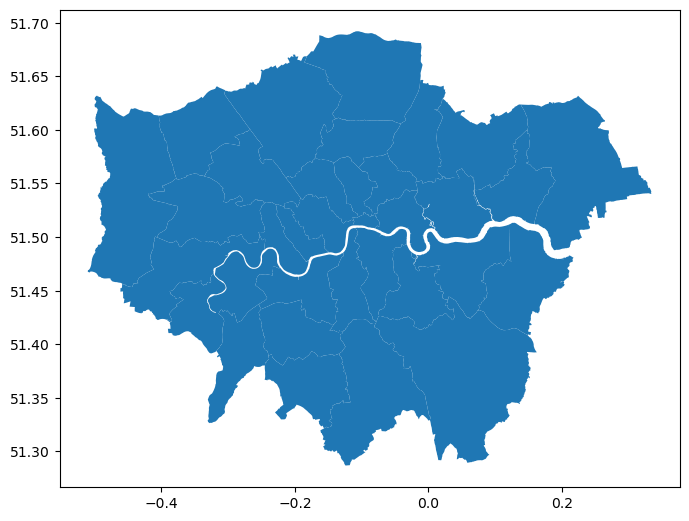

In [15]:
neighbourhoods_geo = gpd.read_file("neighbourhoods.geojson")
neighbourhoods_geo.plot(figsize=(8,8))

In [ ]:
reviews = pl.scan_csv("reviews.csv")
reviews.head()

In [4]:
calendar.head()

listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
i64,str,str,str,str,i64,i64
91031,"""2025-03-10""","""f""","""$99.00""",null,6,89
91031,"""2025-03-11""","""f""","""$99.00""",null,6,89
91031,"""2025-03-12""","""f""","""$99.00""",null,6,89
91031,"""2025-03-13""","""f""","""$99.00""",null,6,89
91031,"""2025-03-14""","""f""","""$99.00""",null,6,89


## Cleaning Datasets

### Listings

In [34]:
listings_cleaned = listings.select(
        "id", "name", "host_id", "host_name", "neighbourhood_group_cleansed",
        "neighbourhood_cleansed", "latitude", "longitude", "room_type",
        "price", "minimum_nights", "number_of_reviews", "last_review",
        "reviews_per_month", "calculated_host_listings_count", 
        "availability_365", "number_of_reviews_ltm", "license"
    ).with_columns(
    price = pl.col("price").str.strip_prefix("$").str.replace_all(",","").cast(pl.Float64)
).filter(~pl.col("price").is_null() & ~pl.col("id").is_null())

len(listings_cleaned.collect())

60341

### Calendar